In [30]:
import pandas as pd

Data = pd.read_csv('Data Sets/1-30_12-240.csv',delimiter = ',')
Data["Time (sec)"] = (Data["Time (sec)"] - Data["Time (sec)"][0])/60

# DataExample = DataExample.iloc[:, [2,4,5,6,9,16]]

Data

,Time (sec),Feed Flowrate (ml/min),Feed Temperature (C),Reboiler Duty (w),Reflux Flowrate (ml/min),Reboiler Pressure (mbar),Reboiler Temperature (C),Tray 11 Temperature (C),Tray 4 Temperature (C),Overhead Vapor Temperature (C),Reflux Temperature (C),Approx Distillate Comp (Wt% CH3OH),Approx Bottoms Comp (Wt% CH3OH),Feed Heater Output (%),Bottoms Pump Output (%),Feed Tank Weight Kg,Ambient Temperature (C),Ambient Pressure (kPa)
0,0.000000,9.999678,64.910836,869.999763,30.999286,875.543006,73.017747,67.105501,62.651184,62.520990,27.355792,95.699620,11.218098,16.411224,-0.001982,13.532153,21.735734,86.615126
1,5.003990,9.999678,65.367505,869.999763,30.999286,875.259884,73.081743,67.208368,62.493306,62.525150,27.393242,95.629513,11.144122,14.886866,-0.001982,13.483807,21.724948,86.594009
2,10.010370,9.999678,64.502516,869.999763,30.999286,875.024445,73.114394,67.155212,62.631905,62.551261,27.381151,95.495310,11.006685,16.957203,-0.001982,13.437646,21.842138,86.584980
3,15.011385,9.999678,65.248044,869.999763,30.999286,875.619747,73.141727,67.083762,62.565409,62.571667,27.460592,95.498018,11.046967,15.618159,-0.001982,13.420258,21.818180,86.583632
4,20.014202,9.999678,65.154701,869.999763,30.999286,879.982620,73.046135,67.131929,62.572043,62.674519,27.507522,95.491704,10.967897,15.311295,-0.001982,13.367847,21.752772,86.578574
5,25.027787,9.999678,64.751657,869.999763,30.999286,873.877801,73.084248,67.210278,62.693626,62.691739,27.577001,95.485904,10.908236,16.686206,-0.001982,13.349364,21.937203,86.574176
6,30.020777,9.999678,65.415029,869.999763,30.999286,874.714687,73.077088,67.328958,62.711884,62.678437,27.471247,95.426418,10.848347,15.050261,-0.001982,13.300502,21.834281,86.569434
7,35.036620,9.999678,64.806328,869.999763,30.999286,874.024764,73.186249,67.305300,62.662219,62.682224,27.404796,95.341411,10.696104,15.821407,-0.001982,13.251426,21.852578,86.553599
8,40.042470,9.999678,64.937721,869.999763,30.999286,873.966463,73.135423,67.339881,62.771281,62.817935,27.380011,95.256125,10.634043,16.024655,-0.001982,13.193028,21.817296,86.555719
9,45.046975,9.999678,65.188175,869.999763,30.999286,880.231470,73.061724,67.381795,62.767536,62.750247,27.512875,95.226587,10.654784,15.367088,-0.001982,13.147541,21.769963,86.553738


# Finding Steady State

In [31]:
import numpy as np

botComp = 'Approx Distillate Comp (Wt% CH3OH)'
distComp = 'Approx Bottoms Comp (Wt% CH3OH)'
λ1 = 0.2
λ2 = λ1
λ3 = 0.1
Rbot = np.zeros(len(Data[botComp]))
Rdist = np.zeros(len(Data[distComp]))


Data[botComp]
Data[distComp]

# Xfbot = λ1*Data[botComp]

def GetR(Xi,Xi_1=0,Xf_1=0,ν2fi_1=0,δ2fi_1=0):
    
    
    
    Xf = λ1*Xi + (1-λ1)*Xf_1
    ν2fi = λ2*(Xi - Xf_1)**2 + (1-λ2)*ν2fi_1
    δ2fi = λ3*(Xi - Xi_1)**2 + (1-λ3)*δ2fi_1
    R = ((2-λ1)*ν2fi)/δ2fi
    return [R,Xf,ν2fi,δ2fi]


myVals = GetR(Data[botComp][0])
Rbot[0] = myVals[0]
for i in range(1,len(Data[botComp])):
    myVals = GetR(Data[botComp][i],Data[botComp][i-1],myVals[1],myVals[2],myVals[3])
    Rbot[i] = myVals[0]

myVals = GetR(Data[distComp][0])
Rdist[0] = myVals[0]
for i in range(1,len(Data[distComp])):
    myVals = GetR(Data[distComp][i],Data[distComp][i-1],myVals[1],myVals[2],myVals[3])
    Rdist[i] = myVals[0]    
    
# print(Rbot)
# print()
# print(Rdist)

Data['R Distillate'] = Rdist
Data['R Bottoms'] = Rbot
Data

,Time (sec),Feed Flowrate (ml/min),Feed Temperature (C),Reboiler Duty (w),Reflux Flowrate (ml/min),Reboiler Pressure (mbar),Reboiler Temperature (C),Tray 11 Temperature (C),Tray 4 Temperature (C),Overhead Vapor Temperature (C),Reflux Temperature (C),Approx Distillate Comp (Wt% CH3OH),Approx Bottoms Comp (Wt% CH3OH),Feed Heater Output (%),Bottoms Pump Output (%),Feed Tank Weight Kg,Ambient Temperature (C),Ambient Pressure (kPa),R Distillate,R Bottoms
0,0.000000,9.999678,64.910836,869.999763,30.999286,875.543006,73.017747,67.105501,62.651184,62.520990,27.355792,95.699620,11.218098,16.411224,-0.001982,13.532153,21.735734,86.615126,3.600000,3.600000
1,5.003990,9.999678,65.367505,869.999763,30.999286,875.259884,73.081743,67.208368,62.493306,62.525150,27.393242,95.629513,11.144122,14.886866,-0.001982,13.483807,21.724948,86.594009,5.717694,5.755310
2,10.010370,9.999678,64.502516,869.999763,30.999286,875.024445,73.114394,67.155212,62.631905,62.551261,27.381151,95.495310,11.006685,16.957203,-0.001982,13.437646,21.842138,86.584980,6.803152,6.924964
3,15.011385,9.999678,65.248044,869.999763,30.999286,875.619747,73.141727,67.083762,62.565409,62.571667,27.460592,95.498018,11.046967,15.618159,-0.001982,13.420258,21.818180,86.583632,7.289157,7.442169
4,20.014202,9.999678,65.154701,869.999763,30.999286,879.982620,73.046135,67.131929,62.572043,62.674519,27.507522,95.491704,10.967897,15.311295,-0.001982,13.367847,21.752772,86.578574,7.331152,7.529914
5,25.027787,9.999678,64.751657,869.999763,30.999286,873.877801,73.084248,67.210278,62.693626,62.691739,27.577001,95.485904,10.908236,16.686206,-0.001982,13.349364,21.937203,86.574176,7.102113,7.343435
6,30.020777,9.999678,65.415029,869.999763,30.999286,874.714687,73.077088,67.328958,62.711884,62.678437,27.471247,95.426418,10.848347,15.050261,-0.001982,13.300502,21.834281,86.569434,6.711491,6.987644
7,35.036620,9.999678,64.806328,869.999763,30.999286,874.024764,73.186249,67.305300,62.662219,62.682224,27.404796,95.341411,10.696104,15.821407,-0.001982,13.251426,21.852578,86.553599,6.208736,6.535664
8,40.042470,9.999678,64.937721,869.999763,30.999286,873.966463,73.135423,67.339881,62.771281,62.817935,27.380011,95.256125,10.634043,16.024655,-0.001982,13.193028,21.817296,86.555719,5.679780,6.037709
9,45.046975,9.999678,65.188175,869.999763,30.999286,880.231470,73.061724,67.381795,62.767536,62.750247,27.512875,95.226587,10.654784,15.367088,-0.001982,13.147541,21.769963,86.553738,5.167195,5.528398


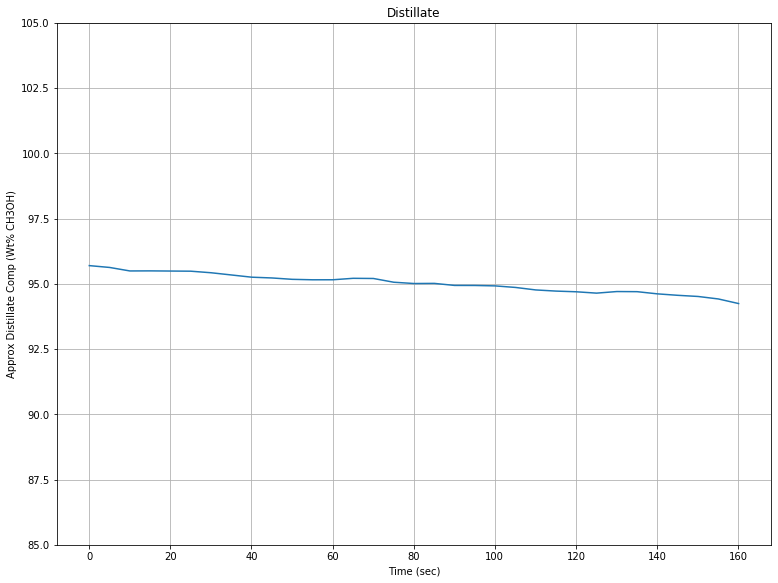

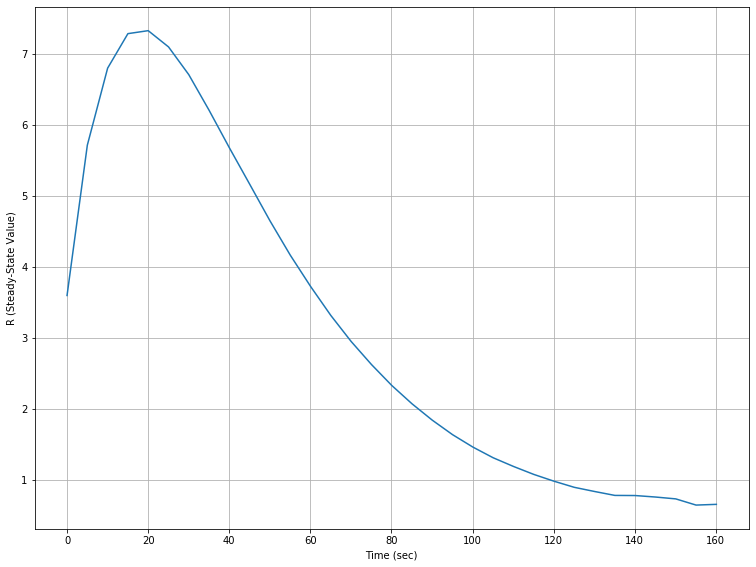

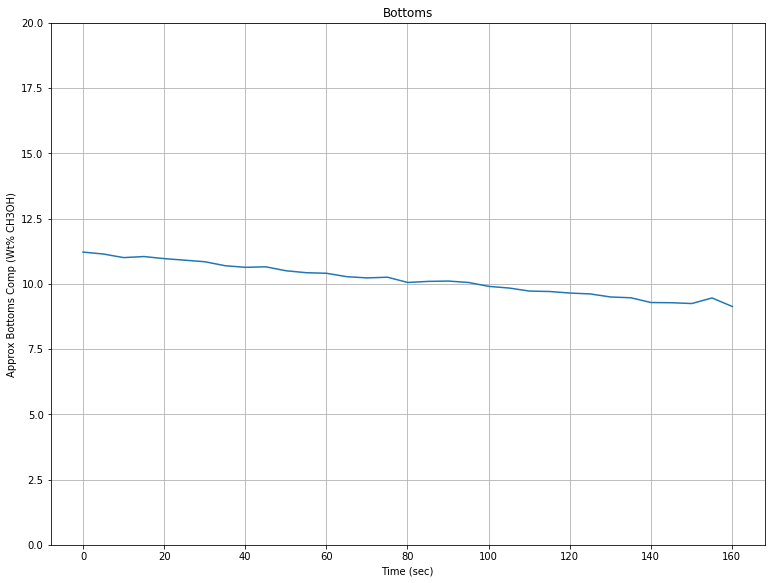

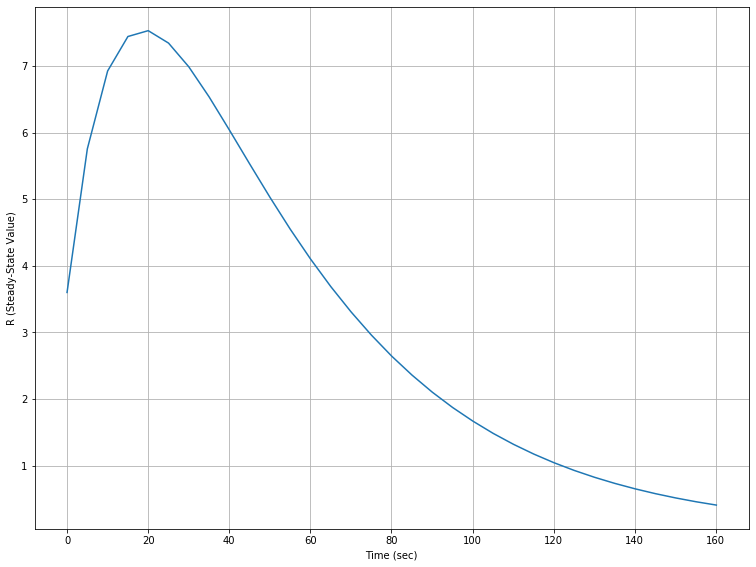

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1,figsize=[6.4*2,4.8*2])
plt.plot(Data['Time (sec)'],Data['Approx Distillate Comp (Wt% CH3OH)'])
plt.title("Distillate")
plt.ylabel("Approx Distillate Comp (Wt% CH3OH)")
plt.xlabel("Time (sec)")
plt.ylim(85,105)
plt.grid()

plt.figure(2,figsize=[6.4*2,4.8*2])
plt.plot(Data['Time (sec)'],Data['R Distillate'])
plt.ylabel("R (Steady-State Value)")
plt.xlabel("Time (sec)")
plt.grid()

plt.figure(3,figsize=[6.4*2,4.8*2])
plt.plot(Data['Time (sec)'],Data['Approx Bottoms Comp (Wt% CH3OH)'])
plt.title("Bottoms")
plt.ylabel("Approx Bottoms Comp (Wt% CH3OH)")
plt.xlabel("Time (sec)")
plt.ylim(0,20)
plt.grid()

plt.figure(4,figsize=[6.4*2,4.8*2])
plt.plot(Data['Time (sec)'],Data['R Bottoms'])
plt.ylabel("R (Steady-State Value)")
plt.xlabel("Time (sec)")
plt.grid()